## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.741715 -0.708160 -1.577636  0.977626 -0.368074  1.501180
1 -0.099524  1.029396  1.180603 -0.073440 -0.179005  1.070714
2 -1.173008 -1.404981 -1.136216 -1.468217  1.645817 -1.295592
3  0.930581 -1.095787  1.248911 -1.167246 -0.865594 -1.043747
4  1.068291 -1.013142 -0.166764  1.287495  0.035859  0.278819


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0128451	total: 69.1ms	remaining: 1m 9s
1:	learn: 1.0015513	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9913566	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9805328	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9714037	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9620802	total: 72.4ms	remaining: 12s
6:	learn: 0.9512497	total: 73ms	remaining: 10.4s
7:	learn: 0.9411857	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9318231	total: 74.2ms	remaining: 8.17s
9:	learn: 0.9222564	total: 74.7ms	remaining: 7.39s
10:	learn: 0.9127205	total: 75.3ms	remaining: 6.77s
11:	learn: 0.9024563	total: 75.8ms	remaining: 6.24s
12:	learn: 0.8942134	total: 76.3ms	remaining: 5.79s
13:	learn: 0.8858499	total: 76.9ms	remaining: 5.41s
14:	learn: 0.8775653	total: 77.4ms	remaining: 5.08s
15:	learn: 0.8689729	total: 78ms	remaining: 4.79s
16:	learn: 0.8609154	total: 78.5ms	remaining: 4.54s
17:	learn: 0.8528179	total: 79.1ms	remaining: 4.31s
18:	learn: 0.8434561	total: 79.6ms	remaining: 4.11

80:	learn: 0.4921179	total: 109ms	remaining: 1.24s
81:	learn: 0.4883858	total: 110ms	remaining: 1.23s
82:	learn: 0.4846798	total: 110ms	remaining: 1.22s
83:	learn: 0.4811320	total: 110ms	remaining: 1.2s
84:	learn: 0.4774785	total: 111ms	remaining: 1.19s
85:	learn: 0.4734990	total: 111ms	remaining: 1.18s
86:	learn: 0.4693028	total: 112ms	remaining: 1.17s
87:	learn: 0.4650840	total: 112ms	remaining: 1.16s
88:	learn: 0.4614697	total: 113ms	remaining: 1.15s
89:	learn: 0.4580165	total: 113ms	remaining: 1.14s
90:	learn: 0.4542627	total: 114ms	remaining: 1.13s
91:	learn: 0.4506470	total: 114ms	remaining: 1.13s
92:	learn: 0.4469297	total: 115ms	remaining: 1.12s
93:	learn: 0.4434532	total: 115ms	remaining: 1.11s
94:	learn: 0.4406934	total: 116ms	remaining: 1.1s
95:	learn: 0.4364811	total: 116ms	remaining: 1.09s
96:	learn: 0.4328551	total: 117ms	remaining: 1.08s
97:	learn: 0.4295821	total: 117ms	remaining: 1.08s
98:	learn: 0.4263280	total: 118ms	remaining: 1.07s
99:	learn: 0.4234171	total: 118ms

231:	learn: 0.1629876	total: 188ms	remaining: 623ms
232:	learn: 0.1615660	total: 189ms	remaining: 622ms
233:	learn: 0.1606018	total: 190ms	remaining: 620ms
234:	learn: 0.1594372	total: 190ms	remaining: 619ms
235:	learn: 0.1582732	total: 191ms	remaining: 617ms
236:	learn: 0.1573262	total: 191ms	remaining: 615ms
237:	learn: 0.1563126	total: 191ms	remaining: 613ms
238:	learn: 0.1551290	total: 192ms	remaining: 611ms
239:	learn: 0.1539741	total: 192ms	remaining: 609ms
240:	learn: 0.1525595	total: 193ms	remaining: 608ms
241:	learn: 0.1516908	total: 193ms	remaining: 606ms
242:	learn: 0.1505178	total: 194ms	remaining: 604ms
243:	learn: 0.1494247	total: 194ms	remaining: 602ms
244:	learn: 0.1483000	total: 195ms	remaining: 601ms
245:	learn: 0.1473892	total: 195ms	remaining: 599ms
246:	learn: 0.1463800	total: 196ms	remaining: 597ms
247:	learn: 0.1455635	total: 197ms	remaining: 596ms
248:	learn: 0.1445421	total: 197ms	remaining: 595ms
249:	learn: 0.1435555	total: 198ms	remaining: 593ms
250:	learn: 

430:	learn: 0.0505336	total: 294ms	remaining: 388ms
431:	learn: 0.0502825	total: 294ms	remaining: 387ms
432:	learn: 0.0500061	total: 295ms	remaining: 386ms
433:	learn: 0.0498484	total: 295ms	remaining: 385ms
434:	learn: 0.0495768	total: 296ms	remaining: 384ms
435:	learn: 0.0493535	total: 296ms	remaining: 383ms
436:	learn: 0.0491356	total: 296ms	remaining: 382ms
437:	learn: 0.0489934	total: 297ms	remaining: 381ms
438:	learn: 0.0488439	total: 298ms	remaining: 381ms
439:	learn: 0.0485805	total: 299ms	remaining: 380ms
440:	learn: 0.0483723	total: 299ms	remaining: 379ms
441:	learn: 0.0482254	total: 300ms	remaining: 378ms
442:	learn: 0.0479583	total: 300ms	remaining: 377ms
443:	learn: 0.0477571	total: 301ms	remaining: 377ms
444:	learn: 0.0475608	total: 301ms	remaining: 376ms
445:	learn: 0.0472720	total: 302ms	remaining: 375ms
446:	learn: 0.0471182	total: 302ms	remaining: 374ms
447:	learn: 0.0469783	total: 303ms	remaining: 373ms
448:	learn: 0.0466930	total: 303ms	remaining: 372ms
449:	learn: 

582:	learn: 0.0281381	total: 373ms	remaining: 267ms
583:	learn: 0.0280104	total: 374ms	remaining: 266ms
584:	learn: 0.0279336	total: 375ms	remaining: 266ms
585:	learn: 0.0278264	total: 375ms	remaining: 265ms
586:	learn: 0.0277189	total: 376ms	remaining: 264ms
587:	learn: 0.0276542	total: 376ms	remaining: 264ms
588:	learn: 0.0276188	total: 377ms	remaining: 263ms
589:	learn: 0.0275454	total: 377ms	remaining: 262ms
590:	learn: 0.0274832	total: 378ms	remaining: 261ms
591:	learn: 0.0274293	total: 378ms	remaining: 261ms
592:	learn: 0.0273685	total: 379ms	remaining: 260ms
593:	learn: 0.0272558	total: 379ms	remaining: 259ms
594:	learn: 0.0271923	total: 380ms	remaining: 258ms
595:	learn: 0.0270944	total: 380ms	remaining: 258ms
596:	learn: 0.0270075	total: 381ms	remaining: 257ms
597:	learn: 0.0269115	total: 382ms	remaining: 257ms
598:	learn: 0.0267934	total: 382ms	remaining: 256ms
599:	learn: 0.0266989	total: 383ms	remaining: 255ms
600:	learn: 0.0266123	total: 383ms	remaining: 254ms
601:	learn: 

777:	learn: 0.0149581	total: 479ms	remaining: 137ms
778:	learn: 0.0149355	total: 480ms	remaining: 136ms
779:	learn: 0.0148727	total: 480ms	remaining: 135ms
780:	learn: 0.0148448	total: 481ms	remaining: 135ms
781:	learn: 0.0148227	total: 481ms	remaining: 134ms
782:	learn: 0.0147998	total: 481ms	remaining: 133ms
783:	learn: 0.0147780	total: 482ms	remaining: 133ms
784:	learn: 0.0147566	total: 482ms	remaining: 132ms
785:	learn: 0.0147305	total: 483ms	remaining: 131ms
786:	learn: 0.0147123	total: 483ms	remaining: 131ms
787:	learn: 0.0146901	total: 484ms	remaining: 130ms
788:	learn: 0.0146380	total: 484ms	remaining: 129ms
789:	learn: 0.0146233	total: 485ms	remaining: 129ms
790:	learn: 0.0145473	total: 485ms	remaining: 128ms
791:	learn: 0.0145243	total: 486ms	remaining: 128ms
792:	learn: 0.0144990	total: 486ms	remaining: 127ms
793:	learn: 0.0144653	total: 487ms	remaining: 126ms
794:	learn: 0.0144049	total: 487ms	remaining: 126ms
795:	learn: 0.0143865	total: 487ms	remaining: 125ms
796:	learn: 

939:	learn: 0.0096605	total: 559ms	remaining: 35.7ms
940:	learn: 0.0096387	total: 559ms	remaining: 35.1ms
941:	learn: 0.0096054	total: 560ms	remaining: 34.5ms
942:	learn: 0.0095830	total: 560ms	remaining: 33.9ms
943:	learn: 0.0095485	total: 561ms	remaining: 33.3ms
944:	learn: 0.0095004	total: 561ms	remaining: 32.7ms
945:	learn: 0.0094784	total: 562ms	remaining: 32.1ms
946:	learn: 0.0094311	total: 562ms	remaining: 31.5ms
947:	learn: 0.0094098	total: 563ms	remaining: 30.9ms
948:	learn: 0.0093884	total: 563ms	remaining: 30.3ms
949:	learn: 0.0093735	total: 564ms	remaining: 29.7ms
950:	learn: 0.0093397	total: 564ms	remaining: 29.1ms
951:	learn: 0.0092960	total: 565ms	remaining: 28.5ms
952:	learn: 0.0092886	total: 565ms	remaining: 27.9ms
953:	learn: 0.0092557	total: 566ms	remaining: 27.3ms
954:	learn: 0.0092099	total: 566ms	remaining: 26.7ms
955:	learn: 0.0091894	total: 567ms	remaining: 26.1ms
956:	learn: 0.0091679	total: 567ms	remaining: 25.5ms
957:	learn: 0.0091534	total: 568ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

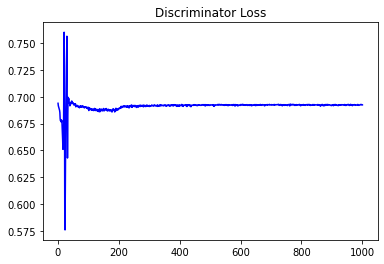

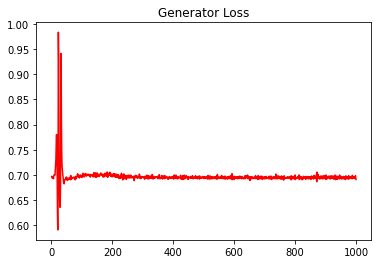

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06996929427187179


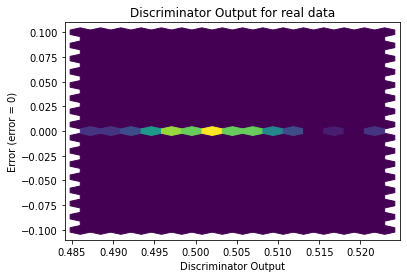

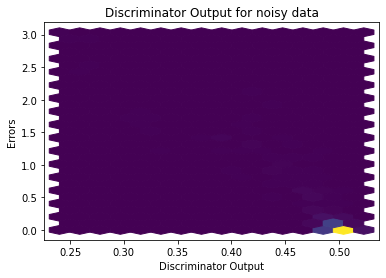

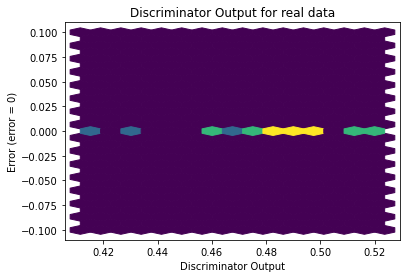

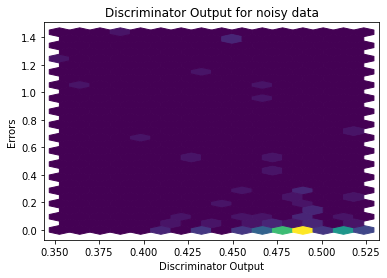

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


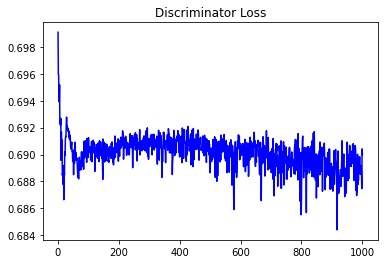

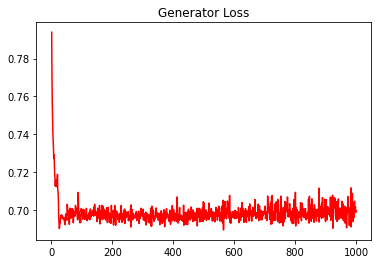

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0824016377196311


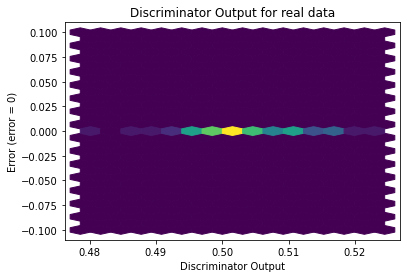

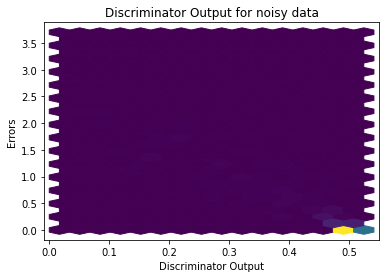

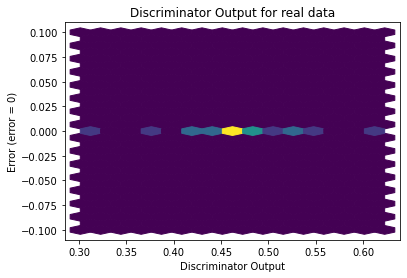

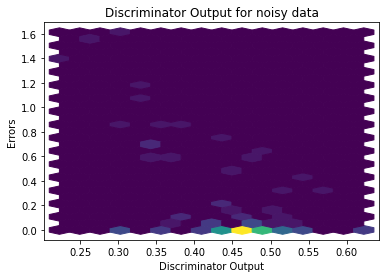

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1274]], requires_grad=True)
